In [62]:
from pathlib import Path
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.gridspec import GridSpec
import matplotlib.colors as colors


In [71]:
loc = Path("/glade/derecho/scratch/brianpm/cloud_cci")

fils = sorted(loc.glob('*.nc'))

ds = xr.open_mfdataset(fils)

In [72]:
ds

<xarray.Dataset> Size: 583GB
Dimensions:                       (time: 415, lat: 360, lon: 720,
                                   hist_phase: 2, hist2d_ctp_bin_centre: 15,
                                   hist2d_cot_bin_centre: 13,
                                   hist1d_cot_bin_centre: 14,
                                   hist1d_ctp_bin_centre: 15,
                                   hist1d_ctt_bin_centre: 16,
                                   ...
                                   hist1d_cla_vis006_bin_border: 14,
                                   hist1d_cla_vis008_bin_border: 14,
                                   hist1d_cer_bin_border: 12,
                                   hist1d_cwp_bin_border: 15,
                                   hist1d_ctp_bin_border: 16,
                                   hist1d_ctt_bin_border: 17)
Coordinates: (12/22)
  * lat                           (lat) float32 1kB -89.75 -89.25 ... 89.75
  * lon                           (lon) float32 3kB -179.8 -179.2 ... 179.8
  * time                          (time) datetime64[ns] 3kB 1982-01-01 ... 20...
  * hist2d_cot_bin_border         (hist2d_cot_bin_border) float32 56B 0.0 ......
  * hist2d_cot_bin_centre         (hist2d_cot_bin_centre) float32 52B 0.15 .....
  * hist2d_ctp_bin_border         (hist2d_ctp_bin_border) float32 64B 1.0 ......
    ...                            ...
  * hist1d_cwp_bin_border         (hist1d_cwp_bin_border) float32 60B 0.0 ......
  * hist1d_cwp_bin_centre         (hist1d_cwp_bin_centre) float32 56B 2.5 ......
  * hist1d_ctp_bin_border         (hist1d_ctp_bin_border) float32 64B 1.0 ......
  * hist1d_ctp_bin_centre         (hist1d_ctp_bin_centre) float32 60B 45.5 .....
  * hist1d_ctt_bin_border         (hist1d_ctt_bin_border) float32 68B 200.0 ....
  * hist1d_ctt_bin_centre         (hist1d_ctt_bin_centre) float32 64B 205.0 ....
Data variables: (12/180)
    nobs                          (time, lat, lon) float64 861MB dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    nobs_day                      (time, lat, lon) float64 861MB dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    nobs_clear_day                (time, lat, lon) float64 861MB dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    nobs_cloudy_day               (time, lat, lon) float64 861MB dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    nobs_clear_night              (time, lat, lon) float64 861MB dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    nobs_cloudy_night             (time, lat, lon) float64 861MB dask.array<chunksize=(1, 360, 720), meta=np.ndarray>
    ...                            ...
    hist1d_ctp                    (time, hist_phase, hist1d_ctp_bin_centre, lat, lon) float64 26GB dask.array<chunksize=(1, 1, 8, 180, 360), meta=np.ndarray>
    hist1d_ctt                    (time, hist_phase, hist1d_ctt_bin_centre, lat, lon) float64 28GB dask.array<chunksize=(1, 1, 8, 180, 360), meta=np.ndarray>
    hist1d_cer                    (time, hist_phase, hist1d_cer_bin_centre, lat, lon) float64 19GB dask.array<chunksize=(1, 1, 6, 180, 360), meta=np.ndarray>
    hist1d_cwp                    (time, hist_phase, hist1d_cwp_bin_centre, lat, lon) float64 24GB dask.array<chunksize=(1, 1, 7, 180, 360), meta=np.ndarray>
    hist1d_cla_vis006             (time, hist_phase, hist1d_cla_vis006_bin_centre, lat, lon) float64 22GB dask.array<chunksize=(1, 1, 7, 180, 360), meta=np.ndarray>
    hist1d_cla_vis008             (time, hist_phase, hist1d_cla_vis008_bin_centre, lat, lon) float64 22GB dask.array<chunksize=(1, 1, 7, 180, 360), meta=np.ndarray>
Attributes: (12/40)
    title:                       ESA Cloud CCI Retrieval Products L3 Output File
    project:                     Climate Change Initiative - European Space A...
    product_version:             3.0
    Conventions:                 CF-1.6,ACDD-1.3
    standard_name_vocabulary:    Standard name table (v29, 08 July 2015)
    institution:                 Deutscher Wetterdienst
  

In [73]:
cfc_ta = ds['cfc'].weighted(ds.time.dt.daysinmonth).mean(dim='time').compute()
cfc_za = ds['cfc'].weighted(np.cos(np.radians(ds.lat))).mean(dim=("lon")).compute()

In [74]:
lwp_ta = ds['lwp'].weighted(ds.time.dt.daysinmonth).mean(dim='time').compute()
lwp_za = ds['lwp'].weighted(np.cos(np.radians(ds.lat))).mean(dim=("lon")).compute()

In [75]:
iwp_ta = ds['iwp'].weighted(ds.time.dt.daysinmonth).mean(dim='time').compute()
iwp_za = ds['iwp'].weighted(np.cos(np.radians(ds.lat))).mean(dim=("lon")).compute()

In [76]:
time = ds.time.dt.year + ds.time.dt.month/12
lat = ds['lat']
lon = ds['lon']

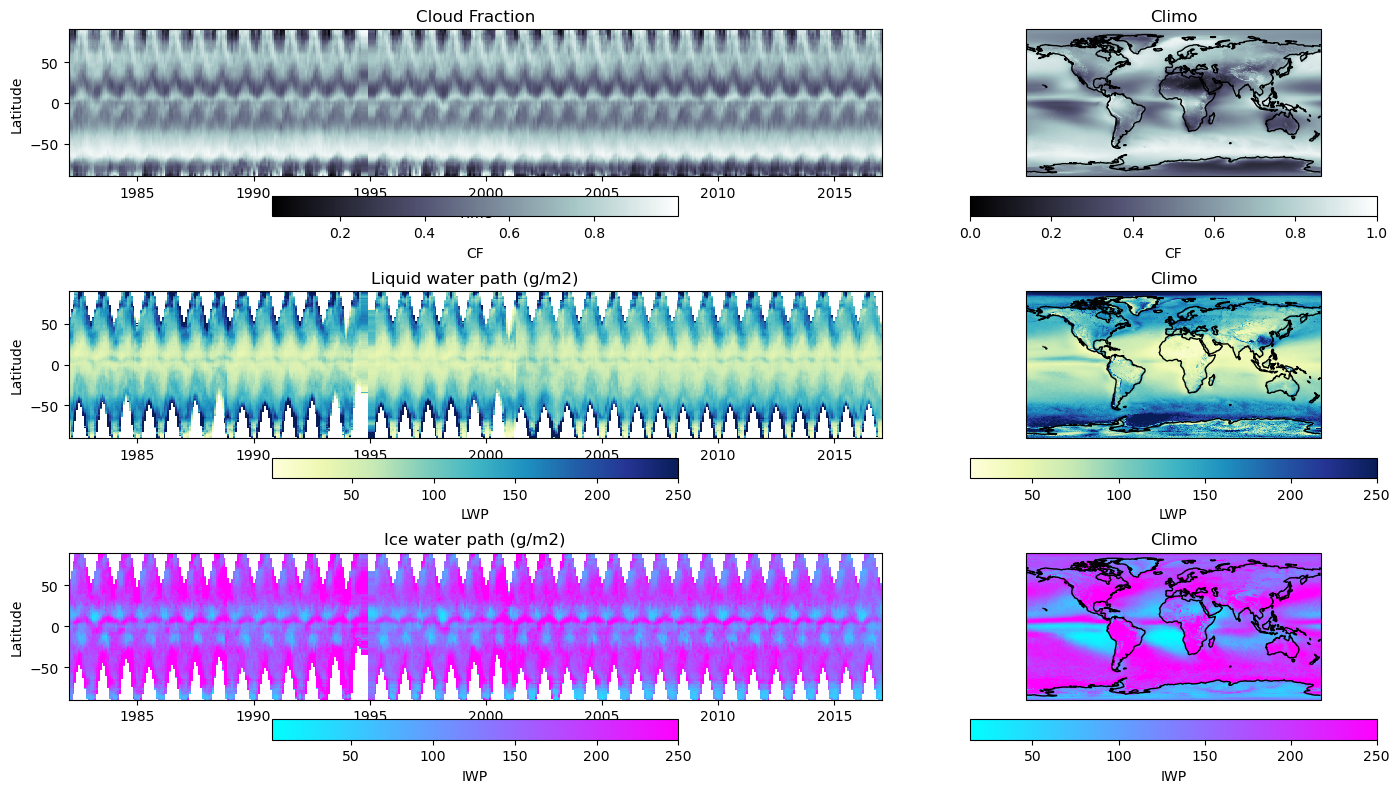

In [89]:
# Create figure with custom grid
fig = plt.figure(figsize=(16, 8))
gs = GridSpec(3, 2, width_ratios=[1, 1])

# Create left subplot for pcolormesh (time-latitude)
ax1 = fig.add_subplot(gs[0,0])
meshtime, meshlat = np.meshgrid(time, lat)
pcm = ax1.pcolormesh(meshtime, meshlat, cfc_za.T, 
                     shading='auto', cmap='bone')
ax1.set_xlabel('Time')
ax1.set_ylabel('Latitude')
ax1.set_title('Cloud Fraction')
# Create colorbar for pcolormesh
cbar = fig.colorbar(pcm, ax=ax1, orientation='horizontal', pad=0.1, shrink=0.5)
cbar.set_label('CF')


ax3 = fig.add_subplot(gs[1, 0])  # Bottom-left panel
pcm3 = ax3.pcolormesh(meshtime, meshlat, lwp_za.T, 
                     shading='auto', cmap='YlGnBu', vmax=250)
ax3.set_xlabel('Time')
ax3.set_ylabel('Latitude')
ax3.set_title('Liquid water path (g/m2)')
# Create colorbar for pcolormesh
cbar3 = fig.colorbar(pcm3, ax=ax3, orientation='horizontal', pad=0.1, shrink=0.5)
cbar3.set_label('LWP')

# third row
ax5 = fig.add_subplot(gs[2, 0])  # Bottom-left panel
pcm5 = ax5.pcolormesh(meshtime, meshlat, iwp_za.T, 
                     shading='auto', cmap='cool', vmax=250)
ax5.set_xlabel('Time')
ax5.set_ylabel('Latitude')
ax5.set_title('Ice water path (g/m2)')
# Create colorbar for pcolormesh
cbar5 = fig.colorbar(pcm5, ax=ax5, orientation='horizontal', pad=0.1, shrink=0.5)
cbar5.set_label('IWP')


# Create right subplot for map with cartopy projection
ax2 = fig.add_subplot(gs[0,1], projection=ccrs.PlateCarree())
ax2.set_global()
ax2.coastlines()
# ax2.gridlines(draw_labels=True)


ax4 = fig.add_subplot(gs[1, 1], projection=ccrs.PlateCarree())  # Bottom-right panel
ax4.set_global()
ax4.coastlines()
# ax4.gridlines(draw_labels=True)

ax6 = fig.add_subplot(gs[2, 1], projection=ccrs.PlateCarree())  # Bottom-right panel
ax6.set_global()
ax6.coastlines()
# ax6.gridlines(draw_labels=True)

# Plot the map data
mlon, mlat = np.meshgrid(lon, lat)
map_plot = ax2.pcolormesh(mlon, mlat, cfc_ta, 
                         transform=ccrs.PlateCarree(),
                         cmap='bone', shading='auto', vmin=0, vmax=1)
ax2.set_title('Climo')

map_plot4 = ax4.pcolormesh(mlon, mlat, lwp_ta, 
                         transform=ccrs.PlateCarree(),
                         cmap='YlGnBu', shading='auto', vmax=250)
ax4.set_title('Climo')

map_plot6 = ax6.pcolormesh(mlon, mlat, iwp_ta, 
                         transform=ccrs.PlateCarree(),
                         cmap='cool', shading='auto', vmax=250)
ax6.set_title('Climo')


# Colorbar for map
cbar2 = fig.colorbar(map_plot, ax=ax2, orientation='horizontal', pad=0.1, shrink=0.5)
cbar2.set_label('CF')

# Colorbar for map
cbar4 = fig.colorbar(map_plot4, ax=ax4, orientation='horizontal', pad=0.1, shrink=0.5)
cbar4.set_label('LWP')

# Colorbar for map
cbar6 = fig.colorbar(map_plot6, ax=ax6, orientation='horizontal', pad=0.1, shrink=0.5)
cbar6.set_label('IWP')

plt.tight_layout()

In [91]:
cla_vis6_ta = ds['cla_vis006'].weighted(ds.time.dt.daysinmonth).mean(dim='time').compute()

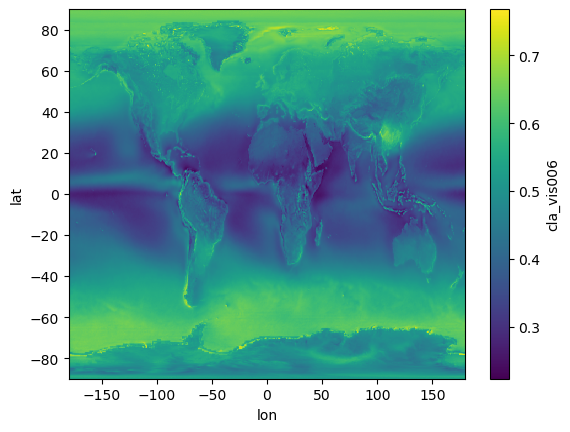

In [92]:
cla_vis6_ta.plot()

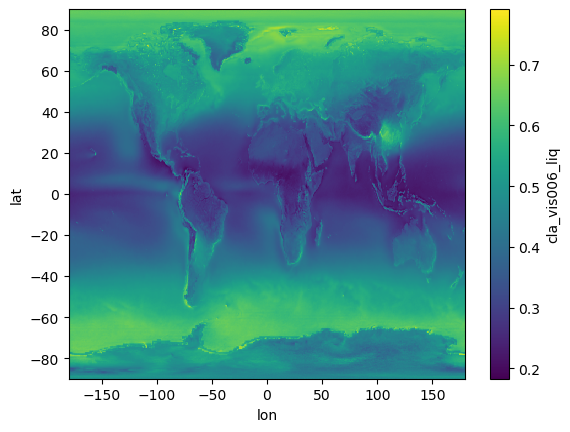

In [93]:
cla_vis6_liq_ta = ds['cla_vis006_liq'].weighted(ds.time.dt.daysinmonth).mean(dim='time').compute()
cla_vis6_liq_ta.plot()

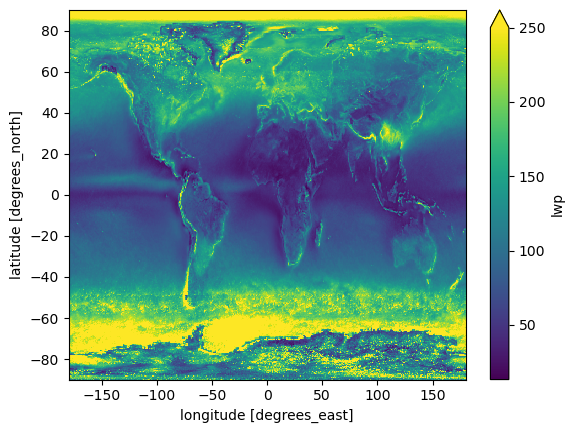

In [23]:
ds['lwp'].mean(dim='time').plot(vmax=250)

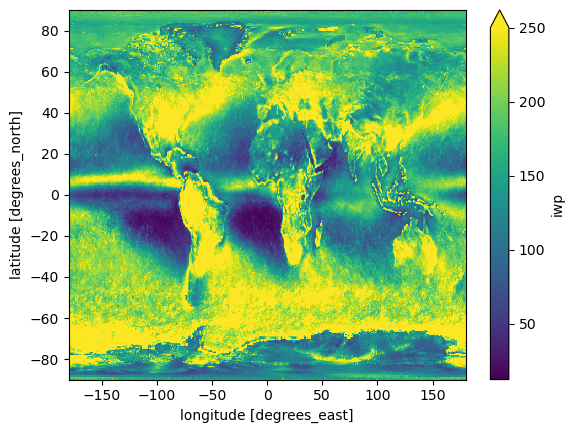

In [24]:
ds['iwp'].mean(dim='time').plot(vmax=250)

In [25]:
ds['iwp']

<xarray.DataArray 'iwp' (time: 129, lat: 360, lon: 720)> Size: 134MB
dask.array<concatenate, shape=(129, 360, 720), dtype=float32, chunksize=(1, 360, 720), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 1kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon      (lon) float32 3kB -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * time     (time) datetime64[ns] 1kB 1988-11-01 1988-12-01 ... 1999-12-01
Attributes:
    long_name:      cloud ice water path
    standard_name:  atmosphere_mass_content_of_cloud_ice
    units:          g/m2
    valid_min:      0.0
    valid_max:      32000.0